In [1]:
import numpy as np
import torch
import gym
import matplotlib.pyplot as plt
from collections import deque
import time

%matplotlib inline
from IPython import display

from dqn_agent import DQN_AGENT

In [2]:
env = gym.make("BipedalWalker-v2")
env.seed(42)
print("State Space  : ", env.observation_space)
print("Action Space : ", env.action_space)

State Space  :  Box(24,)
Action Space :  Box(4,)


In [3]:
env_state_size = env.observation_space.shape[0]
env_action_size = env.action_space.shape[0]

In [ ]:
def plot_scores(scores, rolling_mean):
    plt.plot(scores, label='Scores')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

In [ ]:
def replay_initialize(env, agent, eps, size=50000):
    print(f"Initializing Replay Memory with {size} experiences")
    start = time.time()
    size_count = 0
    state = env.reset()
    while size_count < size:
        action = agent.act(state, eps)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, next_state, reward, done)
        state = next_state
        size_count += 1
        
        if done:
            state = env.reset()
    print("Finished Replay Memory with {} experiences in {:.1f} secs !!".format(size, time.time() - start))

EPISODE 570 ---> Score : -179.70	Rolling Mean : -116.3	Max Score : -86.51	Time : 21.4 secs	eps : 0.06


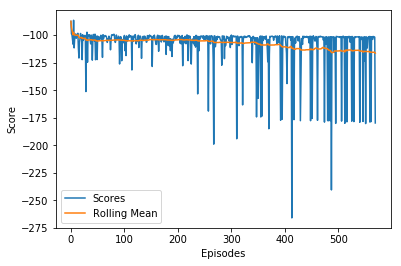

In [ ]:
agent = DQN_AGENT(env_state_size, env_action_size, 42)

eps_start = 1.0
eps_fixed = 0.01
eps_decay = 0.995
eps = eps_start

score = 0
scores_window = deque(maxlen=100)
scores = list()
rolling_mean = list()

episodes = 1000

replay_initialize(env, agent, eps, size=5000)

start = time.time()

for i in range(1, episodes+1):
    state = env.reset()
#     img = plt.imshow(env.render(mode='rgb_array'))
    
    while True:
        action = agent.act(state, eps)
#         img.set_data(env.render(mode='rgb_array'))
#         plt.axis('off')
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, next_state, reward, done)
        state = next_state
        score += reward
        
        if done:
            scores.append(score)
            scores_window.append(score)
            rolling_mean.append(np.mean(scores_window))
            break
    

    if i % 10 == 0:
        display.clear_output(wait=True)
        print("EPISODE {} ---> Score : {:.2f}\tRolling Mean : {:.1f}\tMax Score : {:.2f}\tTime : {:.1f} secs\teps : {:.2f}".format(
               i, score, rolling_mean[-1], np.max(scores), time.time() - start, eps))
        plot_scores(scores, rolling_mean)
        start = time.time()

    
    score = 0
    eps = max(eps_fixed, eps*eps_decay)